# Applied Machine Learning

## 1. A simple classification task

### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pandas.plotting import scatter_matrix

In [3]:
from matplotlib import cm

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from adspy_shared_utilities import plot_fruit_knn

### Datos

In [7]:
df = pd.read_table('datasets/fruit_data_with_colors.txt')

In [8]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [9]:
lookup_fruit_name = dict(zip(df['fruit_label'].unique(), df['fruit_name'].unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

**Separamos nuestros datos**

In [10]:
X = df[['mass', 'width', 'height', 'color_score']]

In [11]:
y = df['fruit_label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**EDA**

In [13]:
cmap = cm.get_cmap('gnuplot')

In [14]:
colores = ['red', 'blue', 'yellow', 'green']

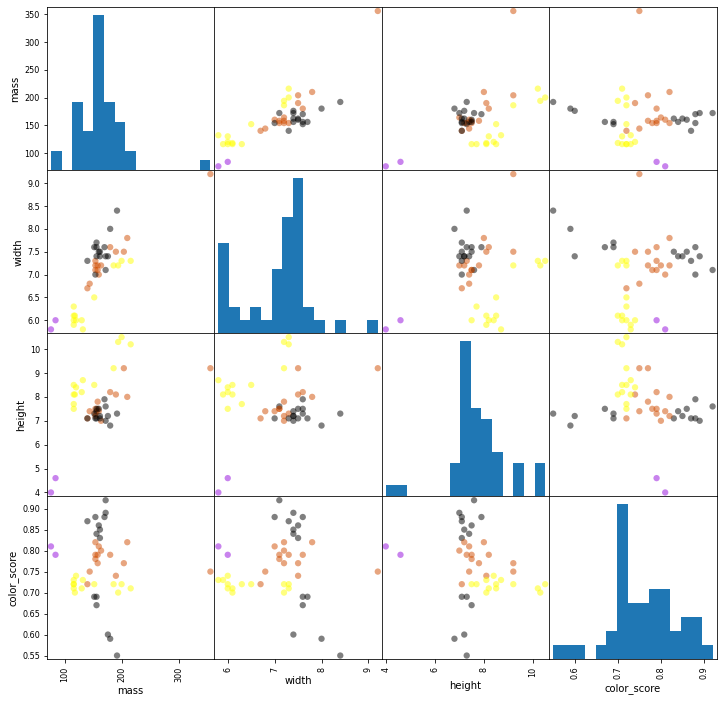

In [15]:
scatter = scatter_matrix(
    X_train, 
    c = y_train,
    marker='o', 
    s=40, 
    hist_kwds={'bins':15},
    figsize=(12,12), 
    cmap=cmap
)

**Clasificador**

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

In [24]:
# Entrenamos el modelo

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# Medimos la precisión del modelo

knn.score(X_test, y_test)

0.8666666666666667

In [26]:
# Hacer predicciones

fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.6]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

C:\Users\jmart\Documents\Proyectos web\Data Science\Applied Machine Learning in Python\adspy_shared_utilities.py:197: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


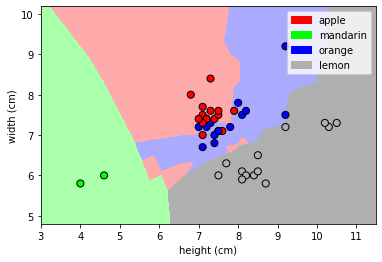

In [29]:
plot_fruit_knn(X_train, y_train, 3, 'uniform')

In [21]:
# Eligiendo el número óptimo de k

k_range = range(1, 20)
scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

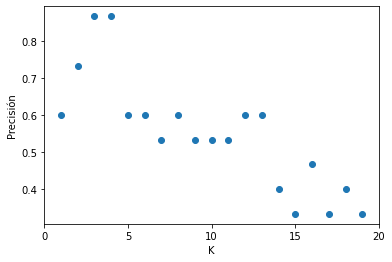

In [22]:
plt.figure()
plt.scatter(k_range, scores)
plt.xlabel('K')
plt.ylabel('Precisión')
plt.xticks([0, 5, 10, 15, 20])
plt.show()